In [9]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [2]:
x = {
    "a":1
}

node_one {'hello': 'world!'}
node_two {}
node_three {'a': 1}
node_four {'a': 1, 'b': 1}
{'secret': True}
result: {'bye': 'world'}


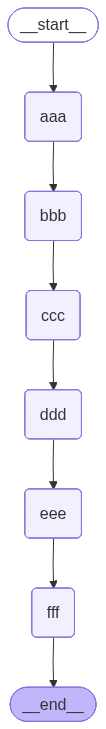

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

class PrivateState(TypedDict):
    a: int
    b: int

class InputState(TypedDict):
    hello: str

class OutputState(TypedDict):
    bye: str

class MegaPrivate(TypedDict):
    secret: bool


graph_builder = StateGraph(PrivateState, input_schema= InputState, output_schema= OutputState)

def node_one(state: InputState) -> InputState:
    print("node_one",state)
    return {
        "hello":"world"
    }
def node_two(state: PrivateState)-> PrivateState:
    print("node_two",state)
    return {
        "a": 1,
    }
def node_three(state: PrivateState)->PrivateState:
    print("node_three",state)   
    return {
        "b":1,
    }

def node_four(state: PrivateState)->OutputState:
    print("node_four",state)   
    return {
        "bye":"world",
    }

def node_five(state: OutputState):
    return{
        "secret": True
    }

def node_six(state: MegaPrivate):
    print(state)



graph_builder.add_node("aaa", node_one)
graph_builder.add_node("bbb", node_two)
graph_builder.add_node("ccc", node_three)
graph_builder.add_node("ddd", node_four)
graph_builder.add_node("eee", node_five)
graph_builder.add_node("fff", node_six)

graph_builder.add_edge(START, "aaa")
graph_builder.add_edge("aaa", "bbb")
graph_builder.add_edge("bbb", "ccc")
graph_builder.add_edge("ccc", "ddd")
graph_builder.add_edge("ddd", "eee")
graph_builder.add_edge("eee", "fff")
graph_builder.add_edge("fff", END)

graph = graph_builder.compile()

result=graph.invoke({
    'hello': 'world!'
})

print("result:", result)

graph.get_graph().draw_ascii()

graph
